# Machine Learning project - consumer complaints

## The data

The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily. [Learn more](https://www.consumerfinance.gov/data-research/consumer-complaints/)

Source: [https://cfpb.github.io/api/ccdb/index.html](https://cfpb.github.io/api/ccdb/index.html)

The dataset is too large to be pushed to a GitHub repo because of a strict file limit (100MB) which this file exceeds. For that reason the dataset file will be split into multiple files with the following code.

In [5]:
import pandas as pd
rows = pd.read_csv('data/complaints-2020-01-22_08_24.csv', chunksize=50000)

for i, chunk in enumerate(rows):
    chunk.to_csv('data/complaints-2020-01-22_08_24/filepart_{}.csv'.format(i))

The dataset is split up into multiple smaller files each still starting with the heading of the original file. The following code will read and concatenate all files into a pandas dataframe.

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

csv_files = 'data/complaints-2020-01-22_08_24/*.csv'
dataset = pd.concat([pd.read_csv(f, header=0, delim_whitespace=False) for f in glob.glob(csv_files)], ignore_index = True)
dataset.head()

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130


### Description

The description of the fields in the dataset:

| Field name | Description | Data type | Notes |
|:---|:---|:---|:---|
| Date received | The date the CFPB received the complaint | date & time |  |
| Product | The type of product the consumer identified in the complaint | plain text | This field is a categorical variable. |
| Sub-product | The type of sub-product the consumer identified in the complaint | plain text | This field is a categorical variable. Not all Products have Sub-products. |
| Issue | The issue the consumer identified in the complaint | plain text | This field is a categorical variable. Possible values are dependent on Product. |
| Sub-issue | The sub-issue the consumer identified in the complaint | plain text | This field is a categorical variable.  Possible values are dependent on product and issue.  Not all Issues have corresponding Sub-issues. |
| Consumer complaint narrative | Consumer complaint narrative is the consumer-submitted description of "what happened" from the complaint. Consumers must opt-in to share their narrative. We will not publish the narrative unless the consumer consents, and consumers can opt-out at any time. The CFPB takes reasonable steps to scrub personal information from each complaint that could be used to identify the consumer. | plain text | Consumers' descriptions of what happened are included if consumers consent to publishing the description and after we take steps to remove personal information. |
| Company public response | The company's optional, public-facing response to a consumer's complaint. Companies can choose to select a response from a pre-set list of options that will be posted on the public database. For example, "Company believes complaint is the result of an isolated error." | plain text | Companies' public-facing responses to complaints are included if companies choose to publish one. Companies may select a public response from a set list of options as soon as they respond to the complaint, but no later than 180 days after the complaint was sent to the company for response. |
| Company | The complaint is about this company | plain text | This field is a categorical variable. |
| State | The state of the mailing address provided by the consumer | plain text | This field is a categorical variable. |
| ZIP code | The mailing ZIP code provided by the consumer | plain text | Mailing ZIP code provided by the consumer. This field may: i) include the first five digits of a ZIP code; ii) include the first three digits of a ZIP code (if the consumer consented to publication of their complaint narrative); or iii) be blank (if ZIP codes have been submitted with non-numeric values, if there are less than 20,000 people in a given ZIP code, or if the complaint has an address outside of the United States). |
| Tags | Data that supports easier searching and sorting of complaints submitted by or on behalf of consumers.  For example, complaints where the submitter reports the age of the consumer as 62 years or older are tagged, ‘Older American.’ Complaints submitted by or on behalf of a servicemember or the spouse or dependent of a servicemember are tagged, ‘Servicemember.’ Servicemember includes anyone who is active duty, National Guard, or Reservist, as well as anyone who previously served and is a Veteran or retiree. | plain text |  |
| Consumer consent provided? | Identifies whether the consumer opted in to publish their complaint narrative. We do not publish the narrative unless the consumer consents and consumers can opt-out at any time. | plain text | This field shows whether a consumer provided consent to publish their complaint narrative, as listed below:<br/><br/>**Consent provided:**<br/>Consumer opted in to share their complaint narrative.<br/><br/>Data populates in this field 60 days after the complaint was sent to the company for response or after the company provides an optional company public response – whichever comes first, and after steps have been taken to scrub personal information from the complaint narrative.<br/><br/>**Consent not provided:**<br/>Consumer did not opt-in to publish their complaint narrative. Data populates in this field 60 days after the complaint was sent to the company for response or after the company provides an optional company public response – whichever comes first.<br/><br/>**Consent withdrawn:**<br/>Consumer opted in to publish their complaint narrative and later withdrew their consent.<br/><br/>**N/A:** Consumers did not have the option to publish their consumer complaint narrative or the complaint was received before March 19, 2015. Data populates in this field immediately.<br/><br/>**Other:** Complaint does not meet criteria for narrative publication.<br/><br/>Blanks appear until at least 60 days after the complaint is sent to the company for response or until the company provides an optional company public response – whichever comes first. |
| Submitted via | How the complaint was submitted to the CFPB | plain text | This field is a categorical variable. |
| Date sent to company | The date the CFPB sent the complaint to the company | date & time |  |
| Company response to consumer | This is how the company responded. For example, "Closed with explanation." | plain text | This field is a categorical variable. |
| Timely response? | Whether the company gave a timely response | plain text | yes/no |
| Consumer disputed? | Whether the consumer disputed the company’s response | plain text | **Yes**<br/>**No**<br/>**N/A:** The Bureau discontinued the consumer dispute option on April 24, 2017. |
| Complaint ID | The unique identification number for a complaint | number |  |

## Exploratory Data Analysis (EDA)

The dataset consists of complaints which have been labeled by a couple of columns. The columns that can be considered labels are the following; Product, Sub-product, Issue, Sub-Issue and Tags. The table below displays the different products with the number of complaints that have been registered for that product. Certain products have more complaints than others. When only considering the product column in terms of data cleanliness one can see that some products overlap. An example of this are the products "Credit card or prepaid card", "Credit card", "Prepaid card". This should be taken into consideration when doing further analysis.

In [37]:
dataset['Product'].value_counts().to_frame()

,Product
"Credit reporting, credit repair services, or other personal consumer reports",141742
Debt collection,105765
Mortgage,61094
Credit reporting,31588
Credit card or prepaid card,31482
Student loan,24930
Credit card,18838
Checking or savings account,18784
Bank account or service,14885
Consumer Loan,9473


The following bar plot shows the distribution of products.

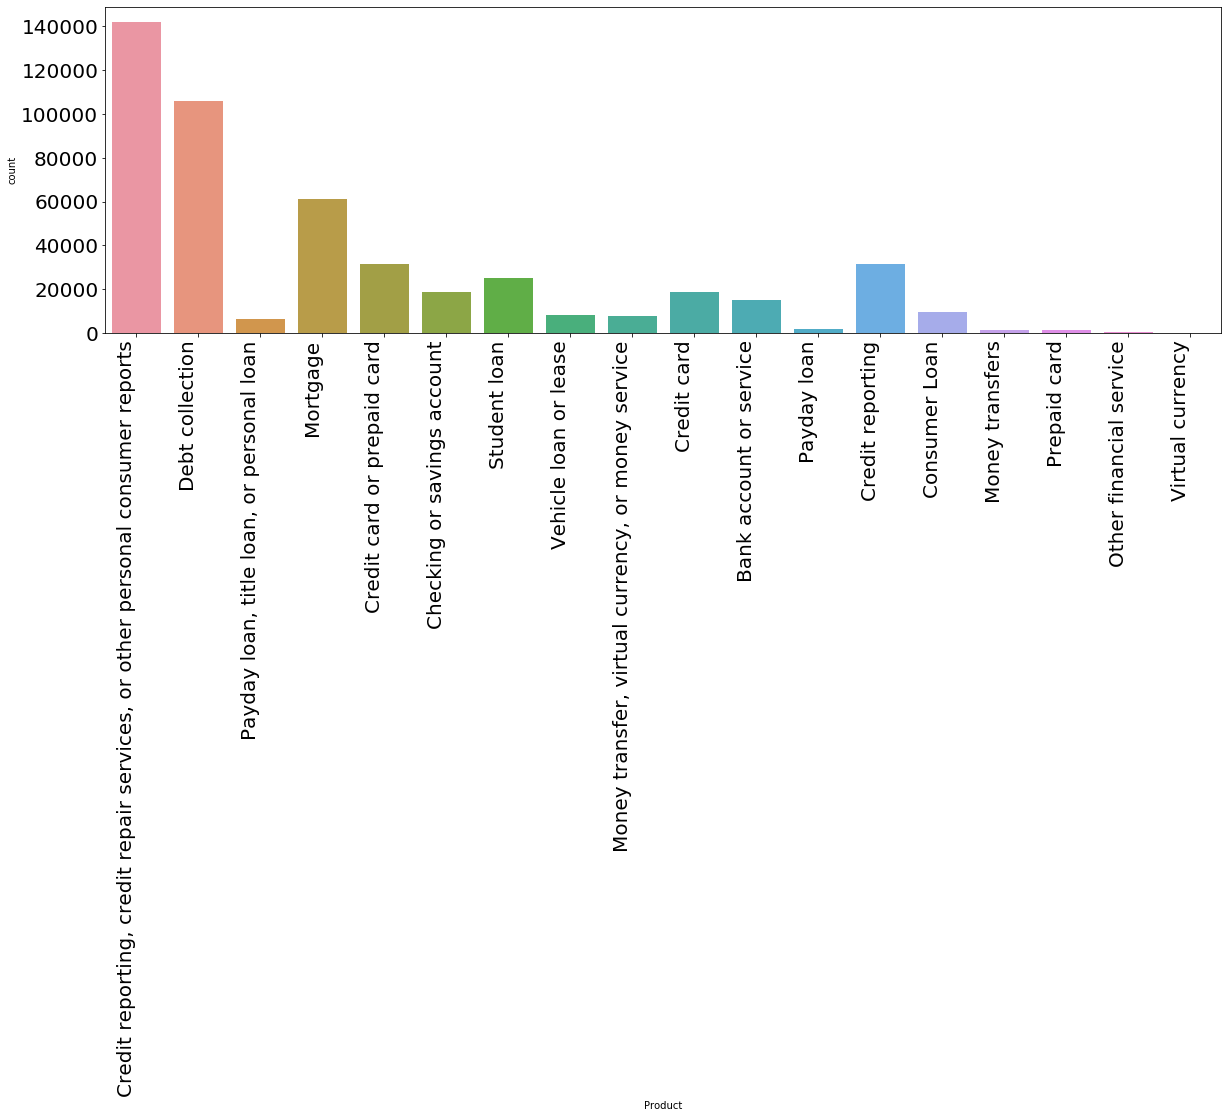

In [107]:
plt.figure(figsize=(20,6))
chart = sns.countplot(x='Product', data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.tick_params(labelsize=20)
plt.show()

The following table consists of the number of complaints per product and their sub-products. A fact about these labels is that sub-products aren't unique for products.

In [4]:
product_cat = dataset.groupby(['Product','Sub-product']).size().to_frame()
pd.set_option('display.max_rows', len(product_cat))
product_cat

0
Product                                            Sub-product                                       
Bank account or service                            (CD) Certificate of deposit                    274
                                                   Cashing a check without an account             134
                                                   Checking account                             10113
                                                   Other bank product/service                    3477
                                                   Savings account                                887
Checking or savings account                        CD (Certificate of Deposit)                    338
                                                   Checking account                             15632
                                                   Other banking product or service              1483
                                                   Personal line of credit                         14
                                                   Savings account                               1317
Consumer Loan                                      Installment loan                              3093
                                                   Pawn loan                                       34
                                                   Personal line of credit                         44
                                                   Title loan                                     199
                                                   Vehicle lease                                  962
                                                   Vehicle loan                                  5141
Credit card                                        None                                         18838
Credit card or prepaid card                        General-purpose credit card or charge card   23961
                                                   General-purpose prepaid card                  1270
                                                   Gift card                                      144
                                                   Government benefit card                        335
                                                   Payroll card                                   131
                                                   Store credit card                             5638
                                                   Student prepaid card                             3
Credit reporting                                   None                                         31588
Credit reporting, credit repair services, or ot... Conventional home mortgage                       1
                                                   Credit repair services                         726
                                                   Credit reporting                            138534
                                                   Other personal consumer report                2481
Debt collection                                    Auto                                          1064
                                                   Auto debt                                     2319
                                                   Credit card                                   7520
                                                   Credit card debt                             14522
                                                   Federal student loan                           549
                                                   Federal student loan debt                     1126
                                                   I do not know                                20639
                                                   Medical                                       6990
                                                   Medical debt                                 11239
                    

Next to product and sub-product as labels, there are also these columns for issues and sub-issues. The two tables below show that a lot of issues exist and that a lot of the sub-issues are labeled "None".

In [6]:
pd.set_option('display.max_rows', len(dataset))
dataset['Issue'].value_counts().to_frame()

,Issue
Incorrect information on your report,77776
Problem with a credit reporting company's investigation into an existing problem,38424
Attempts to collect debt not owed,28629
Incorrect information on credit report,21217
Improper use of your report,20239
Cont'd attempts collect debt not owed,17434
"Loan servicing, payments, escrow account",14722
Communication tactics,13711
Trouble during payment process,13280
Written notification about debt,12365


In [7]:
issue_cat = dataset.groupby(['Issue','Sub-issue']).size().to_frame()
pd.set_option('display.max_rows', len(issue_cat))
issue_cat

0
Issue                                              Sub-issue                                                
APR or interest rate                               None                                                  785
Account opening, closing, or management            None                                                 6347
Account terms and changes                          None                                                   17
Adding money                                       None                                                   92
Advertising                                        Changes in terms from what was offered or adver...     18
                                                   Confusing or misleading advertising about the card     59
Advertising and marketing                          None                                                  830
Advertising and marketing, including promotiona... Confusing or misleading advertising about the c...    947
                                                   Didn't receive advertised or promotional terms       1452
Advertising, marketing or disclosures              None                                                   25
Application processing delay                       None                                                  107
Application, originator, mortgage broker           None                                                 3746
Applied for loan/did not receive money             None                                                   85
Applying for a mortgage                            None                                                  190
Applying for a mortgage or refinancing an exist... None                                                 3004
Arbitration                                        None                                                   83
Attempts to collect debt not owed                  Debt is not yours                                   14708
                                                   Debt was already discharged in bankruptcy and i...   1491
                                                   Debt was paid                                        6413
                                                   Debt was result of identity theft                    6017
Balance transfer                                   None                                                  298
Balance transfer fee                               None                                                   51
Bankruptcy                                         None                                                   96
Billing disputes                                   None                                                 3102
Billing statement                                  None                                                  620
Can't contact lender                               None                                                  372
Can't contact lender or servicer                   None                                                  172
Can't repay my loan                                Can't decrease my monthly payments                   1557
                                                   Can't get flexible payment options                    999
                                                   Can't temporarily postpone payments                   501
Can't stop charges to bank account                 None                                                  166
Can't stop withdrawals from your bank account      None                                                  148
Cash advance                                       None                                                   44
Cash advance fee                                   None                                                   41
Charged bank acct wrong day or amt                 None                                                  106
Charged fees or interest I didn't expect           None                   

The column "Tag" could be considered as a label. The table below shows all unique values for this column and it appears that there are only 4. For this reason, it is not a good feature to use for a model for predictions.

In [8]:
pd.set_option('display.max_rows', len(dataset))
dataset['Tags'].value_counts().to_frame()

,Tags
None,402436
Servicemember,49801
Older American,26802
"Older American, Servicemember",6662


The heatmap below shows the correlation between the columns "Product", "Sub-product", "Issue" and "Sub-issue". We can see that the strongest correlation is between products and issues. 

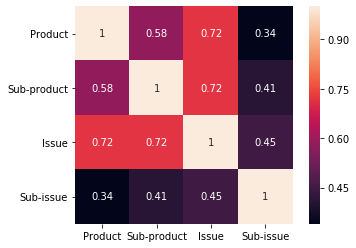

In [9]:
factorized_dataset = dataset.iloc[:,2:6].apply(lambda x: pd.factorize(x)[0])

corr = factorized_dataset.corr().round(2)
sns.heatmap(data=corr, annot=True, square=True)

## Analysis

## Member workload

| Name | Subject | Date |
| :--- | :--- | :--- |
| Gillis Werrebrouck | Initial project setup including setting up the initial notebook, splitting up the dataset and reading all part files into one pandas dataframe. | March 1, 2020 |
| Gillis Werrebrouck | Exploratory data analysis | March 12, 2020 |